Processed Firing Rates Head:
file_name  spike_array_horizontal_line.pkl  spike_array_image_135.pkl  \
neuron_id                                                               
0                                      0.0                       10.0   
1                                      0.0                        5.0   
14                                     0.0                        0.0   
15                                     0.0                        0.0   
16                                     0.0                        0.0   

file_name  spike_array_image_45.pkl  spike_array_vertical_line.pkl  
neuron_id                                                           
0                               0.0                            0.0  
1                               0.0                            0.0  
14                              0.0                            5.0  
15                              0.0                            5.0  
16                              0.0          

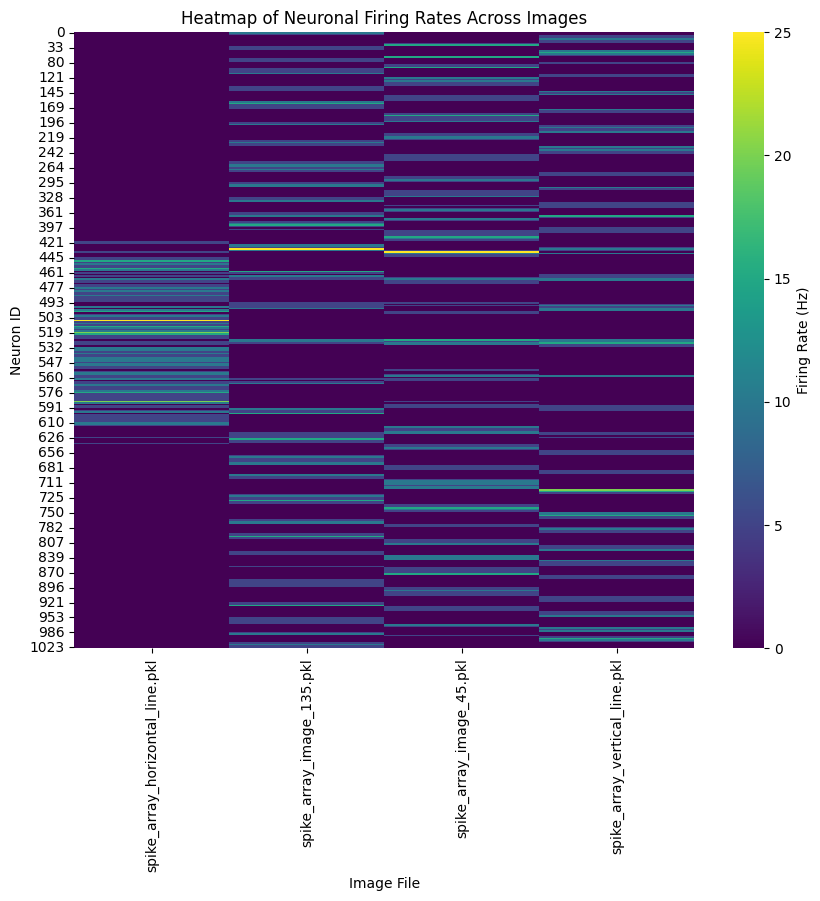

Descriptive Statistics of Firing Rates:
file_name  spike_array_horizontal_line.pkl  spike_array_image_135.pkl  \
count                           411.000000                 411.000000   
mean                              1.873479                   2.153285   
std                               3.795832                   3.751209   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               0.000000                   0.000000   
75%                               0.000000                   5.000000   
max                              25.000000                  25.000000   

file_name  spike_array_image_45.pkl  spike_array_vertical_line.pkl  
count                    411.000000                     411.000000  
mean                       2.214112                       1.934307  
std                        3.756347                       3.539749  
min                       

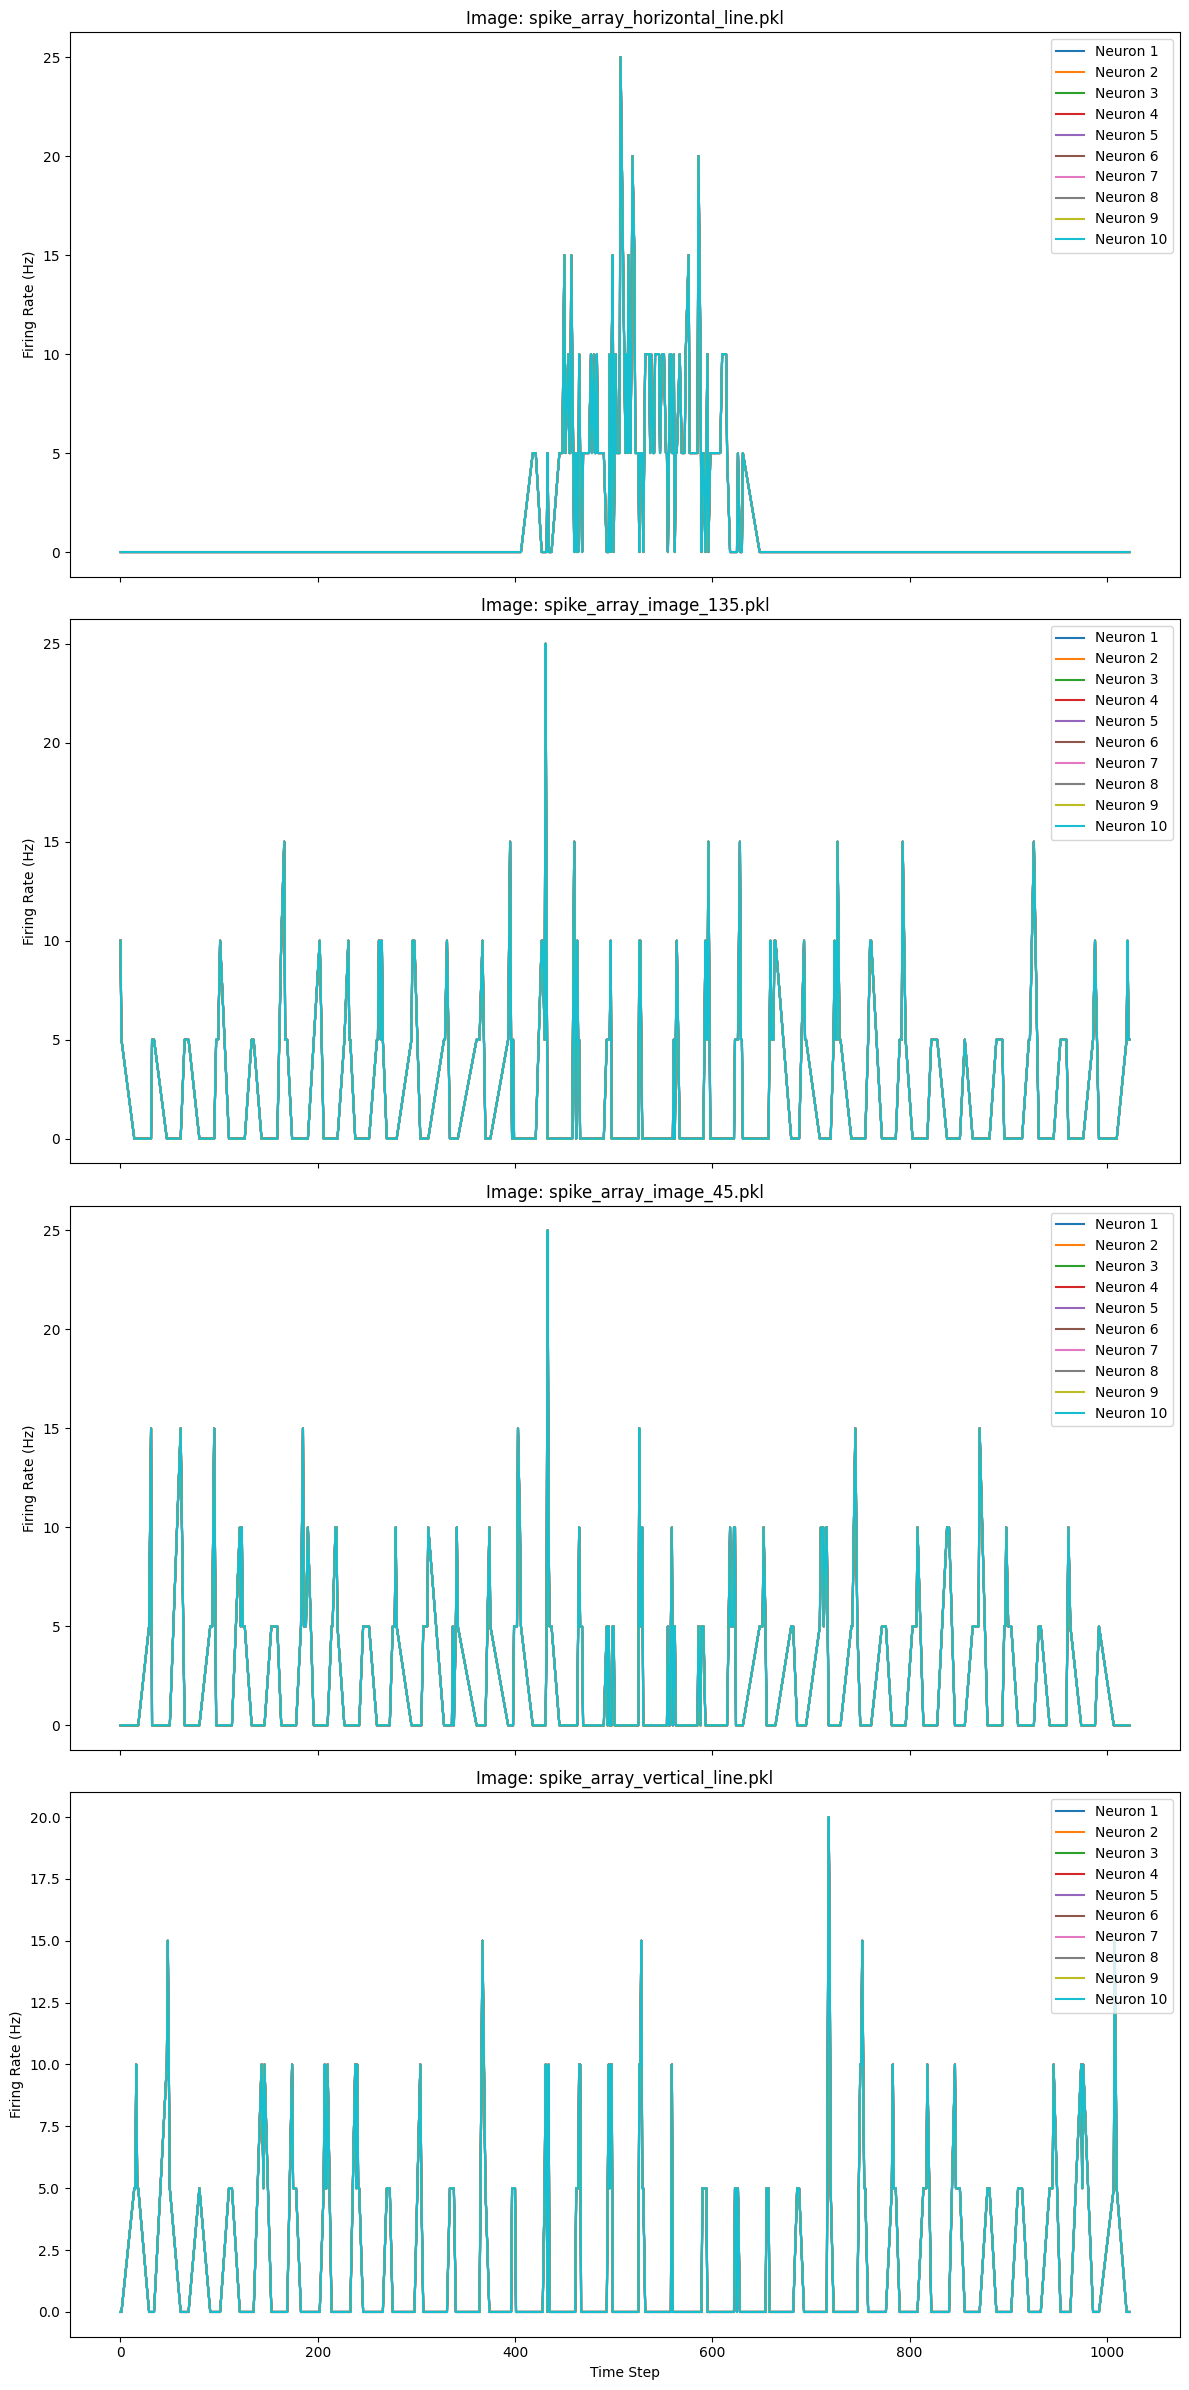

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_input_rates(input_rates, num_neurons_to_plot=10):
    """Plots the input firing rates over time for each image in separate subplots."""
    num_images = input_rates.shape[1]
    fig, axes = plt.subplots(num_images, 1, figsize=(12, 6 * num_images), sharex=True)

    if num_images == 1:
        axes = [axes]

    for idx, (image_file, rates) in enumerate(input_rates.items()):
        ax = axes[idx]
        for neuron_idx in range(min(num_neurons_to_plot, len(rates))):
            ax.plot(rates.index, rates.values, label=f'Neuron {neuron_idx+1}')
        ax.set_title(f'Image: {image_file}')
        ax.set_ylabel('Firing Rate (Hz)')
        ax.legend()

    plt.xlabel('Time Step')
    plt.tight_layout()
    plt.show()

# Load the spike dataset
spike_data = pd.read_csv('spike_dataset.csv')

# Filter out neurons with no spikes
spike_data = spike_data[spike_data['spike_times'] != '[]']

# Define the time window for firing rate calculation
time_window = 200  # ms

# Function to calculate firing rate
def calculate_firing_rate(spike_times, window):
    spike_times = eval(spike_times)
    return len(spike_times) / (window / 1000)  # firing rate in Hz

# Apply the function to calculate firing rates
spike_data['firing_rate'] = spike_data['spike_times'].apply(lambda x: calculate_firing_rate(x, time_window))

# Create a DataFrame for firing rates
firing_rate_df = spike_data.pivot(index='neuron_id', columns='file_name', values='firing_rate')

# Fill NaN values with 0 (if preferred)
firing_rate_df.fillna(0, inplace=True)

# Save the firing rates to a CSV file
firing_rate_df.to_csv('processed_firing_rates.csv')

# Display the cleaned firing rates DataFrame
print("Processed Firing Rates Head:")
print(firing_rate_df.head())

# Visualize the firing rates using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(firing_rate_df, cmap='viridis', cbar_kws={'label': 'Firing Rate (Hz)'})
plt.title('Heatmap of Neuronal Firing Rates Across Images')
plt.xlabel('Image File')
plt.ylabel('Neuron ID')
plt.show()

# Statistical analysis: Descriptive statistics
print("Descriptive Statistics of Firing Rates:")
print(firing_rate_df.describe())

# Plot the input rates
plot_input_rates(firing_rate_df)
